In [8]:
# 필수 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# 데이터셋 로드
# 데이터가 CSV 형식으로 저장되어 있다면 'data.csv'를 실제 데이터 파일 이름으로 교체하십시오.
# 데이터가 다른 형식일 경우 이에 맞게 데이터를 로드하십시오.
data = pd.read_csv("../datasets/Customer_Segmentation.csv")

In [10]:
# 데이터셋의 첫 몇 줄을 표시하여 구조를 이해합니다.
print(data.head())

       ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A  


In [11]:
# Step 1: 데이터 정리
# - 누락된 값 처리
# - 중복 데이터 확인

data.info()  # 데이터 타입과 누락된 값 확인
data = data.drop_duplicates()  # 중복 행 제거
data = data.fillna("Unknown")  # 누락된 값을 "Unknown"으로 간단히 대체

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [12]:
# Step 2: 직업별 지출 우선순위 분석
# 데이터를 직업별로 그룹화하고 평균 지출 점수를 계산합니다.
# profession_spending = data.groupby("Profession")["Spending_Score"].mean().sort_values(ascending=False)

# 문자열 값을 숫자로 변환하는 매핑 설정
spending_mapping = {"Low": 1, "Average": 2, "High": 3}

# 'Spending_Score' 열에 매핑 적용
data["Spending_Score"] = data["Spending_Score"].map(spending_mapping)

# 이제 숫자 데이터로 변환되었으므로 그룹화 후 평균 계산이 가능합니다.
profession_spending = data.groupby("Profession")["Spending_Score"].mean().sort_values(ascending=False)
print(profession_spending)

Profession
Executive        2.454090
Lawyer           2.069021
Artist           1.594197
Engineer         1.487840
Homemaker        1.455285
Unknown          1.451613
Entertainment    1.433087
Doctor           1.347384
Marketing        1.284247
Healthcare       1.099099
Name: Spending_Score, dtype: float64


/tmp/ipykernel_17101/3334931135.py:8: UserWarning: Glyph 51649 (\N{HANGUL SYLLABLE JIG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17101/3334931135.py:8: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17101/3334931135.py:8: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17101/3334931135.py:8: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17101/3334931135.py:8: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17101/3334931135.py:8: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17101/3334931135.py:8: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17101/3334931135.py:8:

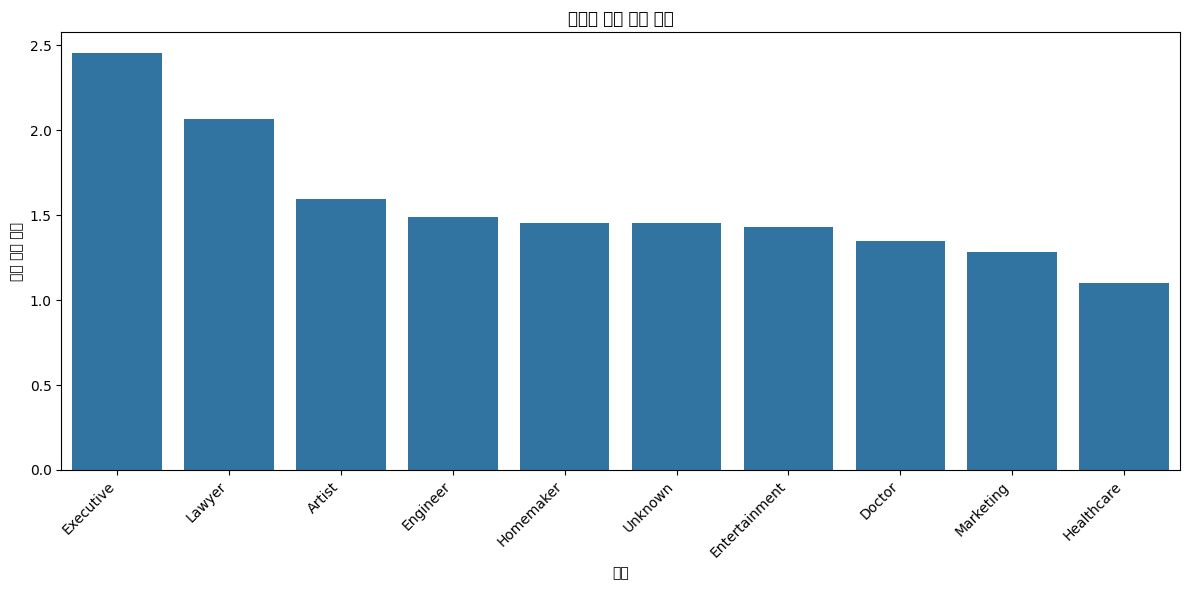

In [13]:
# 직업별 평균 지출 점수 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=profession_spending.index, y=profession_spending.values)
plt.xticks(rotation=45, ha='right')
plt.title("직업별 평균 지출 점수")
plt.xlabel("직업")
plt.ylabel("평균 지출 점수")
plt.tight_layout()
plt.show()

In [14]:
# Step 3: 직업별 잠재적 절감 가능 항목 분석
# '잠재적 절감 가능 항목'을 (100 - Spending_Score)로 계산한다고 가정합니다.
data["Potential_Savings"] = 100 - data["Spending_Score"]

# 데이터를 직업별로 그룹화하고 평균 잠재적 절감 가능 항목을 계산합니다.
profession_savings = data.groupby("Profession")["Potential_Savings"].mean().sort_values(ascending=False)


/tmp/ipykernel_17101/2501116232.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profession_savings.index, y=profession_savings.values, palette="coolwarm")
/tmp/ipykernel_17101/2501116232.py:8: UserWarning: Glyph 51649 (\N{HANGUL SYLLABLE JIG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17101/2501116232.py:8: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17101/2501116232.py:8: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17101/2501116232.py:8: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17101/2501116232.py:8: UserWarning: Glyph 51104 (\N{HANGUL SYLLABLE JAM}) missing from current font.
  plt.tight_layout()

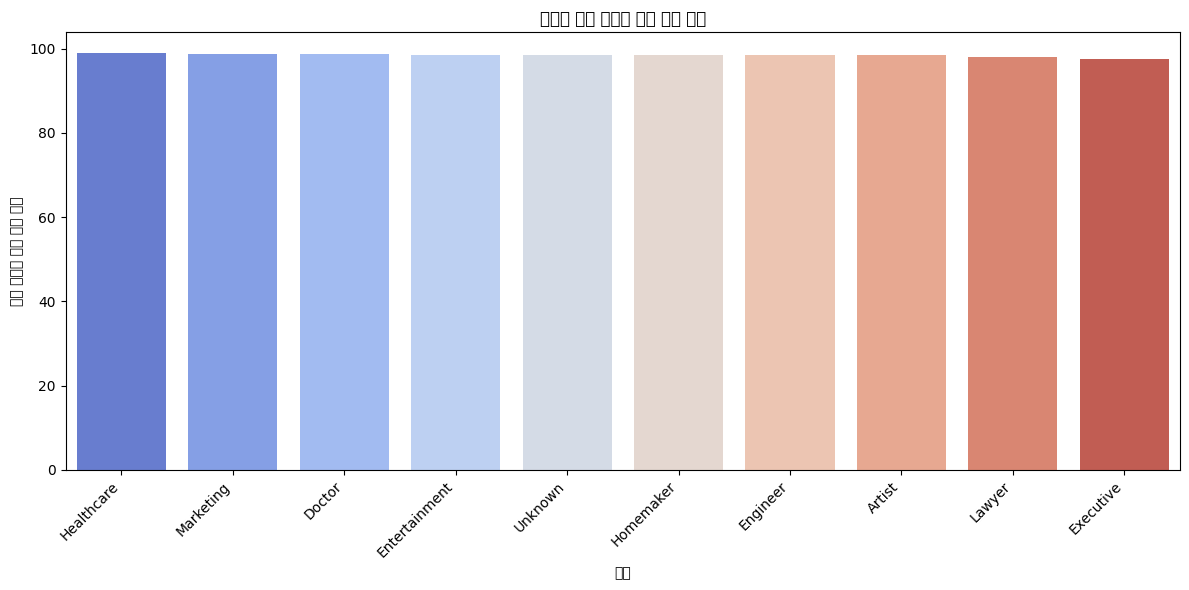

In [15]:
# 직업별 평균 잠재적 절감 가능 항목 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=profession_savings.index, y=profession_savings.values, palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.title("직업별 평균 잠재적 절감 가능 항목")
plt.xlabel("직업")
plt.ylabel("평균 잠재적 절감 가능 항목")
plt.tight_layout()
plt.show()


In [16]:
# Step 4: 직업별 저축 비율 분석
# "저축 비율" = (잠재적 절감 가능 항목 / 지출 점수)로 계산한다고 가정합니다.
data["Savings_Rate"] = data["Potential_Savings"] / data["Spending_Score"]

# 데이터를 직업별로 그룹화하고 평균 저축 비율을 계산합니다.
profession_savings_rate = data.groupby("Profession")["Savings_Rate"].mean().sort_values(ascending=False)


/tmp/ipykernel_17101/1065943950.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profession_savings_rate.index, y=profession_savings_rate.values, palette="viridis")
/tmp/ipykernel_17101/1065943950.py:8: UserWarning: Glyph 51649 (\N{HANGUL SYLLABLE JIG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17101/1065943950.py:8: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17101/1065943950.py:8: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17101/1065943950.py:8: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_17101/1065943950.py:8: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  plt.tight

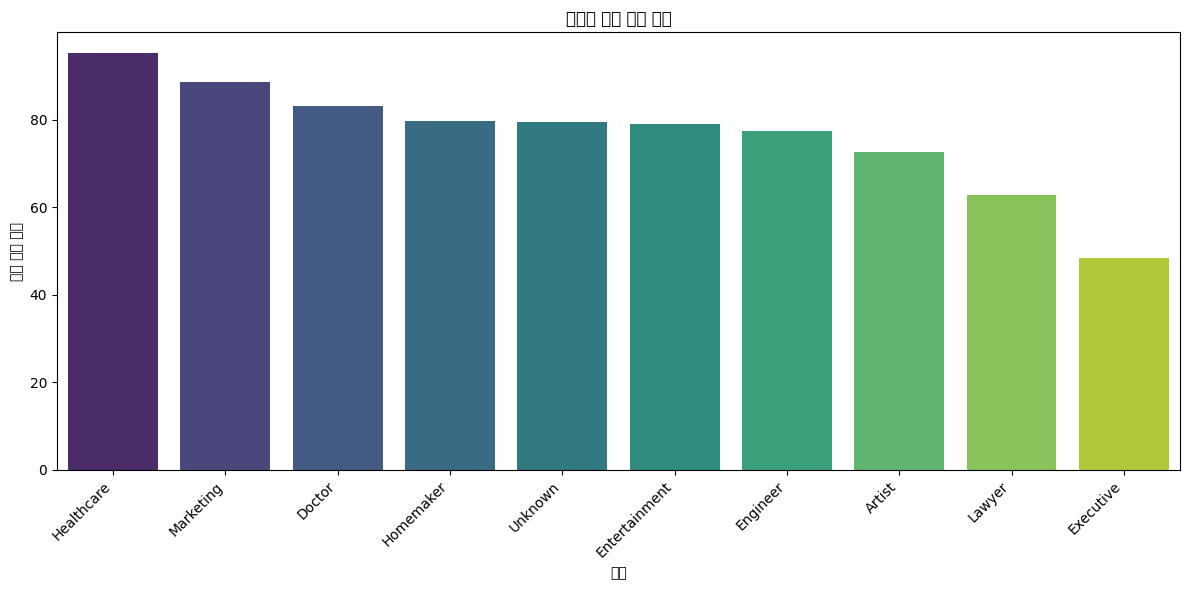

In [17]:
# 직업별 평균 저축 비율 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=profession_savings_rate.index, y=profession_savings_rate.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title("직업별 평균 저축 비율")
plt.xlabel("직업")
plt.ylabel("평균 저축 비율")
plt.tight_layout()
plt.show()

In [18]:
# Step 5: 결론
# 분석 결과를 요약하고, 이를 바탕으로 솔루션을 제안합니다.
print("요약:")
print(f"지출 점수가 높은 주요 직업군: {profession_spending.head(3).index.tolist()}")
print(f"잠재적 절감 가능 항목이 높은 직업군: {profession_savings.head(3).index.tolist()}")
print(f"저축 비율이 높은 직업군: {profession_savings_rate.head(3).index.tolist()}")

요약:
지출 점수가 높은 주요 직업군: ['Executive', 'Lawyer', 'Artist']
잠재적 절감 가능 항목이 높은 직업군: ['Healthcare', 'Marketing', 'Doctor']
저축 비율이 높은 직업군: ['Healthcare', 'Marketing', 'Doctor']
